<img src="http://www.digitalvidya.com/wp-content/uploads/2013/05/logoa5-300x95.png">

## Data Analysis using Python Assignment Week 7
### Digital Vidya Copyright

We get NSE stocks data using package nsepy. You will have to first install nsepy using the command pip install nsepy. 

Use function get_history, it fetches the price history of stocks/indices/derivatives and returns a pandas dataframe.

We are going to use data of 'INFY', 'HDFC', 'RELIANCE', 'WIPRO' 

We have created the dataframes hdfc, infy, wipro and reliance. 

We will use the dataframes created above to create plots.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nsepy import get_history
import datetime as dt
%matplotlib inline

start = dt.datetime(2015, 1, 1)

end = dt.datetime.today()

infy = get_history(symbol='INFY', start = start, end = end)
infy.index = pd.to_datetime(infy.index)

hdfc = get_history(symbol='HDFC', start = start, end = end)
hdfc.index = pd.to_datetime(hdfc.index)

reliance = get_history(symbol='RELIANCE', start = start, end = end)
reliance.index = pd.to_datetime(reliance.index)

wipro = get_history(symbol='WIPRO', start = start, end = end)
wipro.index = pd.to_datetime(wipro.index)


### Answer the following questions. Do remember to add appropriate title to the graphs.

#### 1. Use the dataframe open_prices created below to plot a line graph showing each of the four stocks price. Set the figure size to 15,6 for better visualization and add grids. The plot will have four lines depicting each stock and a legend.

In [4]:
open_prices = pd.concat([infy['Open'], hdfc['Open'], reliance['Open'], wipro['Open']], axis = 1)
open_prices.columns = ['Infy', 'Hdfc', 'Reliance', 'Wipro']
open_prices.head()

,Infy,Hdfc,Reliance,Wipro
Date,,,,
2015-01-01,1968.95,1130.0,886.3,552.55
2015-01-02,1972.00,1127.3,888.1,553.40
2015-01-05,2009.90,1168.8,885.0,557.05
2015-01-06,1980.00,1148.6,870.0,555.00
2015-01-07,1965.00,1097.5,837.1,543.20


Text(0, 0.5, 'Price ($)')

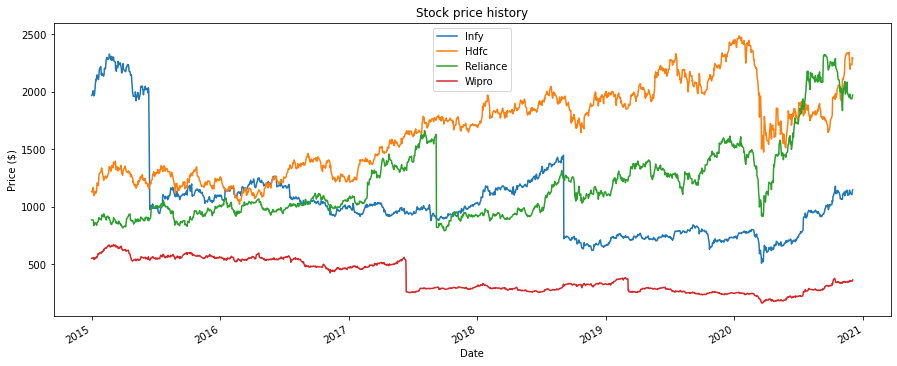

In [10]:
axes = open_prices.plot(kind='line', figsize =(15,6), title='Stock price history')
axes.set_xlabel('Date')
axes.set_ylabel('Price ($)')

#### 2. Use the dataframe open_prices created in qn 1 to create open_yearly with mean open prices every year. Create a bar chart with stock name on X-axis and price on Y-axis. The resulting plot will have multiple bar plot comparing price of each stock for 2015, 2016 and 2017. The legend should specify which colored bar represents which year for each stock.

             Infy         Hdfc     Reliance       Wipro
Date                                                   
2015  1550.506855  1251.421371   916.047177  580.706452
2016  1101.763765  1247.437247  1014.485830  520.401417
2017   963.428629  1592.671573  1195.694556  379.542540
2018  1048.416463  1862.144512  1041.130081  297.232114
2019   741.081020  2096.764286  1323.192857  280.370000


Text(0, 0.5, 'Mean price ($)')

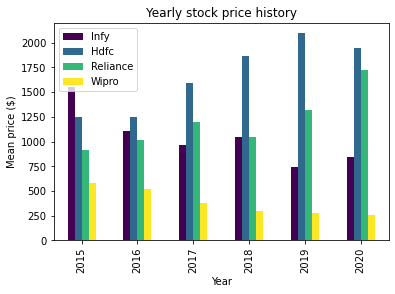

In [76]:
open_yearly_prices = open_prices.copy()
# Pandas has built-in support for datetime aggregation
open_yearly_prices = open_yearly_prices.groupby(open_yearly_prices.index.year).mean()
print(open_yearly_prices.head())
axes = open_yearly_prices.plot.bar(colormap = 'viridis', title='Yearly stock price history')
axes.set_xlabel('Year')
axes.set_ylabel('Mean price ($)')

#### 3. Plot 4 different line plots for the 4 companies in dataframe open_prices. Year would be on X-axis, stock price on Y axis, you will need (2,2) plot. Set figure size to 10, 8 and share X-axis for better visualization.

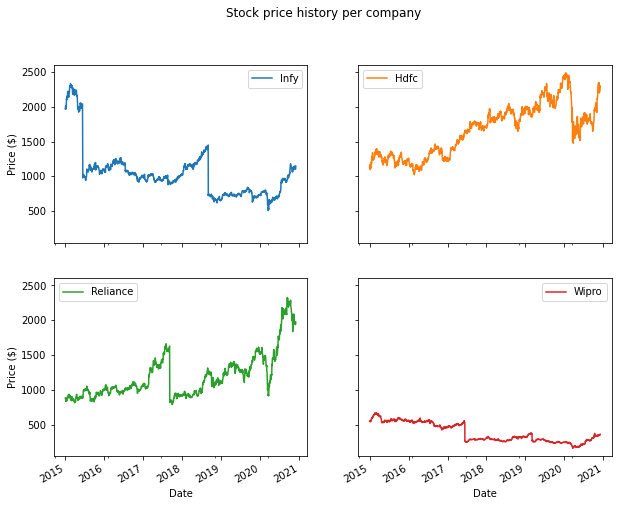

In [49]:
axes = open_prices.plot(kind='line', figsize =(10,8), subplots=True, layout=(2,2),
                        sharex=True, sharey=True, title='Stock price history per company')
for i in range(2):
    for j in range(2):
        axes[i][j].set_xlabel('Date')
        axes[i][j].set_ylabel('Price ($)')

#### 4. Get the stock prices for TCS for the same time period and plot a line graph with two lines representing daily high and low prices respectively.

In [82]:
tcs = get_history(symbol='TCS', start = start, end = end)
tcs.index = pd.to_datetime(tcs.index)
tcs_open_prices = tcs[['High', 'Low']]
tcs_open_prices.head()

,High,Low
Date,,
2015-01-01,2567.00,2541.00
2015-01-02,2590.95,2550.60
2015-01-05,2599.90,2524.65
2015-01-06,2529.10,2440.00
2015-01-07,2479.15,2407.45


Text(0, 0.5, 'Price ($)')

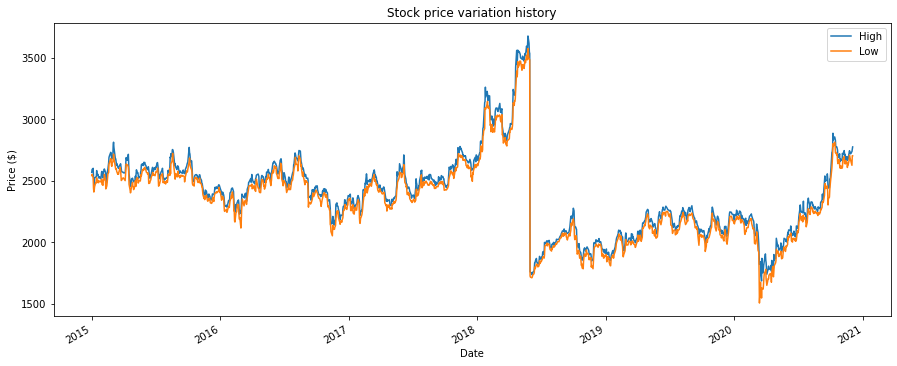

In [83]:
axes = tcs_open_prices.plot(kind='line', figsize =(15,6), title='Stock price variation history')
axes.set_xlabel('Date')
axes.set_ylabel('Price ($)')

#### 5. Create 3 pie charts from the open_prices dataframe, each representing % mean prices of stocks per year. You should get three charts for year 2015, 2016 and 2017 respectively. Try the parameter layout = (2,2) to get 2 plots on each row.

Date          2015      2016      2017
Infy      0.360694  0.283661  0.233200
Hdfc      0.291117  0.321166  0.385510
Reliance  0.213100  0.261190  0.289421
Wipro     0.135089  0.133983  0.091869


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001233397A820>,
      dtype=object)

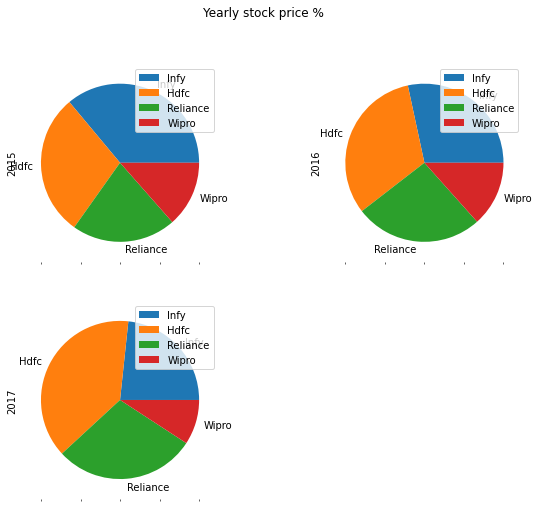

In [79]:
# Compute stock price percentages first
open_yearly_prices = open_yearly_prices.div(open_yearly_prices.sum(axis=1), axis=0)
# Then drop unrequired years abd transpose data frame as we'd like
# to create a pie chart per year (row) and not company (column)
open_yearly_prices = open_yearly_prices[open_yearly_prices.index <= 2017].transpose()
print(open_yearly_prices.head())
open_yearly_prices.plot(kind='pie', figsize =(10,8), subplots=True, layout=(2,2), title='Yearly mean stock price %')